In [ ]:
from ba import BAModel
bamodel=BAModel(2)
bamodel.ba_run(1,100)
bamodel.draw()

In [ ]:
from grover import Grover
from qba import QBA
import plot
import write
from networkx import DiGraph
PATH=[(0,0.),(1,1.)]
MAX=1
N=5
# G=Grover([])
# G.complete_graph(N)
# G.grover(MAX,PATH)
# G.arc_plot()
# G=Grover([])
# G.complete_graph(N)
# G.matrix_grover(MAX,PATH)
# G.arc_plot()
qba=QBA().build_circular_ladder_graph(N,PATH)
qba.grover(MAX)
plot.deg_plot(DiGraph(qba.arcs))
#write.write_for_csv(qba,PATH)

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import time
# import plot
# from grover import Grover
# PATH=[(0,1.),(1,-1.)]
# G=Grover([])
# G.complete_graph(3)
# times=[]
# for _ in range(5):
#     time_sta = time.perf_counter()
#     # G.grover(100000,PATH)
#     G.matrix_grover(100000,PATH)
#     G.qba_run(2,PATH)
#     time_end = time.perf_counter()
#     times.append(time_end-time_sta)
# plot.plot_time(times)
# G.make_count_histgram()
# G.deg_plot()

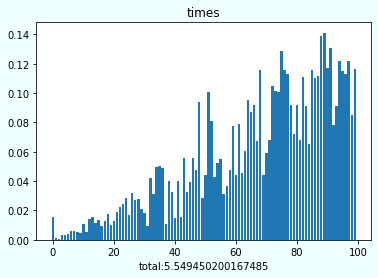

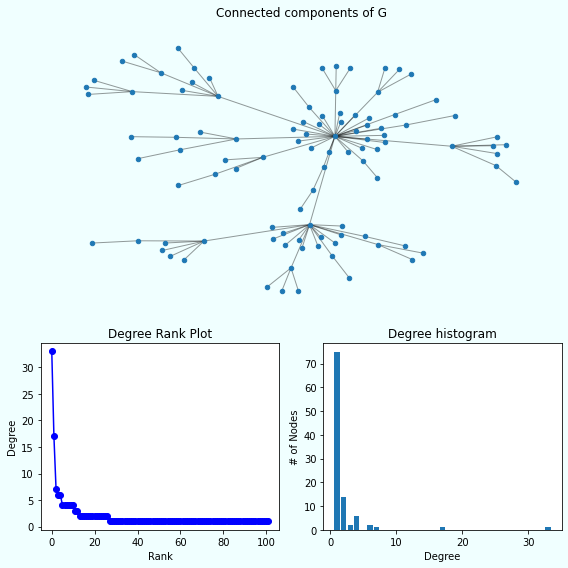

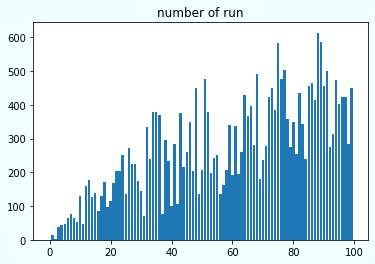

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import time
import plot
from qba import QBA
PATH=[(0,0.7),(1,-0.2)]
# qba=QBA().build_comp_graph(3,PATH)
qba=QBA().build_path_graph(2,PATH)
qba.run_qba(100,5000)

In [ ]:
from ba import BAModel
bamodel=BAModel(2)
bamodel.ba_run(1,500)
bamodel.draw()

not converged
1.2499999999999996


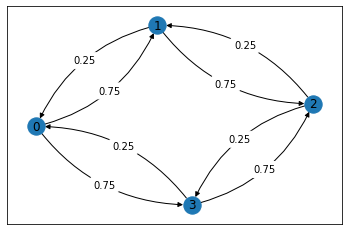

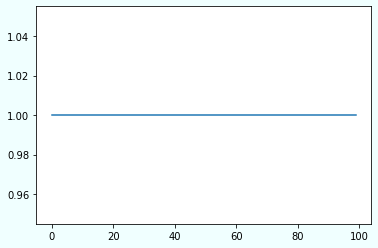

1.0000000000000002 6


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import time
import plot
from qba import QBA

PATH=[(0,1.),(2,0.)]
# qba=QBA().build_comp_graph(3,PATH)
qba=QBA().build_circuit_graph(4,PATH)
prob_vertex=[0,1,2,3]
qba.grover(250,False)
qba.arc_plot()
print(np.sum(qba.weights**2)/2)
qba.non_flow_grover(100,prob_vertex)
qba.plot_origin_prob()

In [ ]:
from qba import QBA
import numpy as np

## 線を刺す
PATH=[]
num_of_v=10
add_v=0
prob_vertex=[0]
num_pin=100
qba=QBA().build_comp_graph(num_of_v,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=num_pin
# print(qba.deg)
#qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v)])
# qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v),(add_v,num_of_v+1),(num_of_v+1,add_v)])
qba.arcs.extend([(add_v, num_of_v+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# print(qba.arcs)
# qba.arc_plot()
qba.non_flow_grover(100,prob_vertex)
qba.plot_origin_prob()


In [ ]:
from qba import QBA
import numpy as np

# 辺を取って外につける
PATH=[]
num_of_v=5
add_v=0
prob_vertex=[0]
num_pin=1
qba=QBA().build_comp_graph(num_of_v,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
# qba.deg=np.append(qba.deg,1)
# qba.deg=np.append(qba.deg,1)
# qba.deg[add_v]+=num_pin
# print(qba.deg)
#qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v)])
# qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v),(add_v,num_of_v+1),(num_of_v+1,add_v)])
qba.arcs.extend([(add_v, num_of_v+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v+a,add_v) for a in range(num_pin)])
print(qba.arcs)
for a in range(num_pin):
    qba.arcs.remove((add_v,add_v+a+1))
    qba.arcs.remove((add_v+a+1,add_v))
    qba.deg[add_v+a+1]-=1
#print(qba.deg)

qba.weights = np.zeros(len(qba.arcs))
qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
qba.non_flow_grover(25,prob_vertex)
qba.plot_origin_prob()


In [ ]:
from qba import QBA
import numpy as np

# 辺をとる
PATH=[]
num_of_v=25
# add_v=0
prob_vertex=[0]
# num_pin=1
remove_arc=(0,1)
qba=QBA().build_comp_graph(num_of_v,PATH)
qba.arcs.remove(remove_arc)
qba.arcs.remove(remove_arc[::-1])
qba.deg[remove_arc[0]]-=1
qba.deg[remove_arc[1]]-=1

# print(qba.deg)
qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
print(qba.arcs)
qba.weights[250]=1.
# for i in range(len(qba.arcs)):
#     qba.weights[i]=1/np.sqrt(len(qba.arcs))
# qba.arc_plot()
qba.non_flow_grover(150,prob_vertex)
# qba.arc_plot()
qba.plot_origin_prob()


In [ ]:
from qba import QBA
import numpy as np

##長いピンを一本刺す 途中
PATH=[]
num_of_v=4
add_v=0
prob_vertex=[0]
num_pin=1
num_pin_len=3
qba=QBA().build_comp_graph(num_of_v,PATH)
for _ in range(num_pin-1):
    qba.deg=np.append(qba.deg,2)
qba.deg[add_v]+=num_pin
# print(qba.deg)
#qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v)])
# qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v),(add_v,num_of_v+1),(num_of_v+1,add_v)])
qba.arcs.extend([(add_v, num_of_v+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
qba.non_flow_grover(2,prob_vertex)
qba.plot_origin_prob()

In [ ]:
from qba import QBA
import numpy as np

PATH=[]
num_of_v_n=2
num_of_v_m=3
add_v=0
prob_vertex=[a for a in range(num_of_v_n)]
num_pin=1
# prob_vertex=[a for a in range(num_of_v_n, num_of_v_m+num_of_v_n)]
# prob_vertex=[0]
qba=QBA().build_comp_biber_graph(num_of_v_n,num_of_v_m,PATH)
qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=1
qba.arcs.extend([(add_v,num_of_v_n+num_of_v_m),(num_of_v_n+num_of_v_m, add_v)])
qba.weights = np.zeros(len(qba.arcs))
# for i in range(len(qba.arcs)-2):
#     qba.weights[i]=1.
qba.arc_plot()
qba.non_flow_grover(100,prob_vertex,num_pin)
qba.plot_origin_prob()

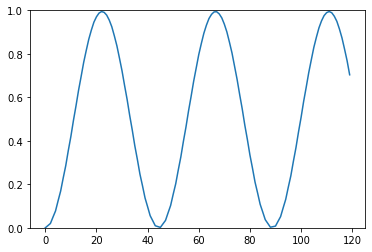

0.9945939491159681 110
0.7037545952358862
[0.010 0.020 0.049 0.077 0.124 0.169 0.229 0.286 0.356 0.420 0.493 0.560
 0.632 0.695 0.760 0.815 0.867 0.909 0.945 0.970 0.987 0.994 0.991 0.978
 0.955 0.925 0.883 0.837 0.780 0.722 0.654 0.590 0.517 0.450 0.377 0.314
 0.247 0.194 0.137 0.097 0.056 0.033 0.009 0.006 0.002 0.018 0.034 0.069
 0.103 0.154 0.203 0.266 0.326 0.398 0.463 0.537 0.604 0.673 0.735 0.796
 0.847 0.895 0.932 0.962 0.982 0.993 0.994 0.984 0.966 0.937 0.900 0.854
 0.804 0.743 0.682 0.613 0.547 0.473 0.407 0.335 0.275 0.210 0.161 0.108
 0.073 0.037 0.020 0.003 0.005 0.008 0.030 0.051 0.092 0.131 0.186 0.239
 0.306 0.368 0.441 0.507 0.581 0.646 0.713 0.772 0.830 0.877 0.920 0.952
 0.976 0.990 0.995 0.989 0.973 0.949 0.914 0.873 0.822 0.768 0.704]


In [16]:
from qba import QBA
import numpy as np

## 刺した場所の重みを反転させる
PATH=[]
num_of_v=100
add_v=num_of_v-1
# add_v=0
prob_vertex=[num_of_v-1]
num_pin=1
# qba=QBA().build_comp_graph(num_of_v,PATH)
# qba=QBA().build_star_graph(num_of_v,PATH)
qba=QBA().build_wheel_graph(num_of_v,PATH)
# qba=QBA().build_path_graph(num_of_v,PATH)
# qba=QBA().build_circuit_graph(num_of_v,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=num_pin
#print(qba.deg)
qba.arcs.extend([(add_v, num_of_v+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# print(qba.arcs)
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
    
# qba.non_flow_grover(140,prob_vertex,num_pin,True)
# qba.plot_origin_prob()

prob_arcs=[(add_v, num_of_v+a) for a in range(num_pin) ] + [(num_of_v+a, add_v) for a in range(num_pin) ]
# prob_arcs=[(num_of_v+a, add_v) for a in range(num_pin) ]
qba.non_flow_grover_arcs(120,prob_arcs,num_pin,True)
qba.plot_origin_prob()

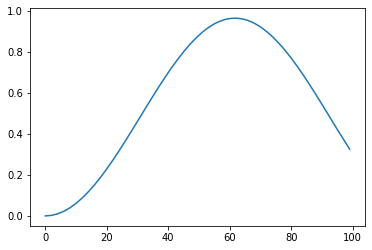

0.9632697201552007 61
0.3253865808685039


In [36]:
from qba import QBA
import numpy as np
import math

## 刺した場所の重みを反転させる
## HSPを考えてみる
PATH=[]
n=12
k=3
num_of_v=math.comb(n,k)
add_v=[0,219]
# add_v=[i for i in range(20,30)]
# print(add_v)
# add_v=num_of_v-1
prob_vertex=[num_of_v-1]
num_pin=1
# qba=QBA().build_comp_graph(num_of_v,PATH)
qba=QBA().build_Johnson_graph(n,k,PATH)

for _ in range(num_pin*len(add_v)):
    qba.deg=np.append(qba.deg,1)
for i in add_v:
    qba.deg[i]+=num_pin

# for _ in range(num_pin):
#     qba.deg=np.append(qba.deg,1)
# qba.deg[0]+=num_pin
# print(qba.deg)
count=-1
for i in add_v:
    count+=1
    for j in range(num_pin):
        qba.arcs.extend([(i, num_of_v+j+count*num_pin) for a in range(num_pin)])
        qba.arcs.extend([(num_of_v+j+count*num_pin, i) for a in range(num_pin)])
# qba.arcs.extend([(0, num_of_v+a) for a in range(num_pin)])
# qba.arcs.extend([(num_of_v+a,0) for a in range(num_pin)])
# qba.arcs.extend([(2, num_of_v+num_pin+a) for a in range(num_pin)])
# qba.arcs.extend([(num_of_v+num_pin+a,2) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# print(qba.arcs)


for i in range(len(qba.arcs)-num_pin*2*len(add_v)):
    qba.weights[i]=1.
# qba.arc_plot()

# qba.weights[len(qba.arcs)-num_pin*2]=1
# qba.weights[len(qba.arcs)-num_pin*2+1]=-1


# qba.weights[len(qba.arcs)-num_pin*4]=1
# qba.weights[len(qba.arcs)-num_pin*4+1]=1
# qba.weights[len(qba.arcs)-4]=1
# qba.arc_plot()
# print(qba.arcs)
# qba.non_flow_grover(140,prob_vertex,num_pin,True)
# qba.plot_origin_prob()

# prob_arcs=[(add_v[0], num_of_v+a) for a in range(num_pin) ] + [(num_of_v+a, add_v[0]) for a in range(num_pin)]
prob_arcs=[(add_v[i], num_of_v+a+i) for a in range(num_pin) for i in range(len(add_v)) ] + [(num_of_v+a+i , add_v[i]) for a in range(num_pin) for i in range(len(add_v)) ]
# print(prob_arcs)
# prob_arcs=[(0,20)]+[(20,0)]
qba.non_flow_grover_arcs_test(100,prob_arcs,add_v,num_pin,True)
qba.plot_origin_prob()


# qba.weights = np.zeros(len(qba.arcs))
# # print(qba.arcs)
# # qba.arc_plot()
# # for i in range(len(qba.arcs)-num_pin*2*len(add_v)):
# #     qba.weights[i]=1.
# qba.weights[len(qba.arcs)-num_pin*2]=1
# qba.weights[len(qba.arcs)-num_pin*2+1]=-1
# prob_arcs=[(add_v[1], num_of_v+a+1) for a in range(num_pin) ] + [(num_of_v+a+1, add_v[1]) for a in range(num_pin)]
# print(prob_arcs)
# qba.non_flow_grover_arcs_test(200,prob_arcs,add_v,num_pin,True)
# qba.plot_origin_prob()


# qba.weights = np.zeros(len(qba.arcs))
# # print(qba.arcs)
# # qba.arc_plot()
# # for i in range(len(qba.arcs)-num_pin*2*len(add_v)):
# #     qba.weights[i]=1.
# qba.weights[len(qba.arcs)-num_pin*2]=1
# qba.weights[len(qba.arcs)-num_pin*2+1]=-1
# # prob_arcs=[(add_v[1], num_of_v+a+1) for a in range(num_pin) ] + [(num_of_v+a+1, add_v[1]) for a in range(num_pin)]
# prob_arcs=[(a,b) for a in range(num_of_v) for b in range(num_of_v)]
# for a in range(num_of_v):
#     prob_arcs.remove((a,a))
# # print(prob_arcs)
# qba.non_flow_grover_arcs_test(200,prob_arcs,add_v,num_pin,True)
# qba.plot_origin_prob()

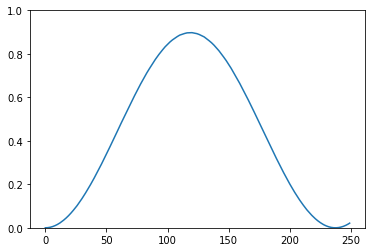

0.8974562257901302 119
0.021445440571175478
[3.228e-04 6.457e-04 1.568e-03 2.490e-03 4.074e-03 5.659e-03 7.837e-03
 1.001e-02 1.283e-02 1.564e-02 1.905e-02 2.246e-02 2.647e-02 3.049e-02
 3.507e-02 3.965e-02 4.480e-02 4.995e-02 5.568e-02 6.142e-02 6.774e-02
 7.407e-02 8.086e-02 8.765e-02 9.479e-02 1.019e-01 1.099e-01 1.179e-01
 1.261e-01 1.342e-01 1.429e-01 1.515e-01 1.608e-01 1.700e-01 1.793e-01
 1.887e-01 1.986e-01 2.086e-01 2.187e-01 2.289e-01 2.395e-01 2.501e-01
 2.608e-01 2.716e-01 2.825e-01 2.934e-01 3.047e-01 3.160e-01 3.276e-01
 3.392e-01 3.506e-01 3.621e-01 3.737e-01 3.854e-01 3.974e-01 4.095e-01
 4.210e-01 4.325e-01 4.446e-01 4.568e-01 4.687e-01 4.806e-01 4.922e-01
 5.038e-01 5.157e-01 5.275e-01 5.390e-01 5.506e-01 5.623e-01 5.741e-01
 5.852e-01 5.963e-01 6.074e-01 6.184e-01 6.294e-01 6.404e-01 6.510e-01
 6.616e-01 6.718e-01 6.819e-01 6.922e-01 7.024e-01 7.119e-01 7.214e-01
 7.303e-01 7.392e-01 7.486e-01 7.580e-01 7.661e-01 7.742e-01 7.822e-01
 7.902e-01 7.976e-01 8.049e-01 8.

In [1]:
from qba import QBA
import numpy as np

## 刺した場所の重みを反転させる
## hypercube 用
PATH=[]
dim=10
add_v=0
num_pin=1
prob_vertex=[0]
# qba=QBA().build_comp_graph(dim,PATH)
# qba=QBA().build_wheel_graph(dim,PATH)
qba=QBA().build_hypercube_graph(dim,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=num_pin
#print(qba.deg)
qba.arcs.extend([(add_v, 2**dim+a) for a in range(num_pin)])
qba.arcs.extend([(2**dim+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# print(qba.arcs)
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
# qba.non_flow_grover(100,prob_vertex,num_pin,True)
# qba.plot_origin_prob()

# prob_arcs=[(j, 0) for j in range(1,dim+1)]
prob_arcs=[(0, 2**dim+a) for a in range(num_pin)] + [(2**dim+a, 0) for a in range(num_pin)]
# print(prob_arcs)
# prob_arcs=[(0, 2**dim), (2**dim, 0)]
# qba.arc_plot()
qba.non_flow_grover_arcs(250,prob_arcs,num_pin,True)
qba.plot_origin_prob()

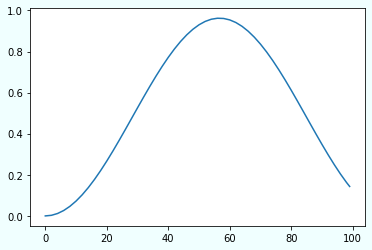

0.9619861396320397 56


In [18]:
from qba import QBA
import numpy as np

## 刺した場所の重みを反転させる
## 完全二部
PATH=[]
num_of_v_1=50
num_of_v_2=25
add_v=0
prob_vertex=[0]
num_pin=1
qba=QBA().build_comp_biber_graph(num_of_v_1,num_of_v_2,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=num_pin
#print(qba.deg)
qba.arcs.extend([(add_v, num_of_v_1+num_of_v_2+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v_1+num_of_v_2+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# print(qba.arcs)
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
# qba.non_flow_grover(100,prob_vertex,num_pin,True)
# qba.plot_origin_prob()

prob_arcs=[(add_v, num_of_v_1+num_of_v_2+a) for a in range(num_pin) ] + [(num_of_v_1+num_of_v_2, add_v) for a in range(num_pin) ]
# print(prob_arcs)
qba.non_flow_grover_arcs(100,prob_arcs,num_pin,True)
qba.plot_origin_prob()

[2 2 4 6 4 4 4 4]


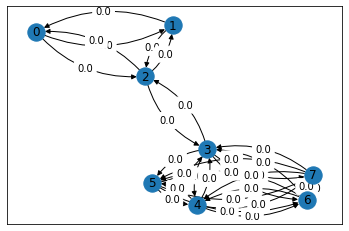

In [4]:
from qba import QBA
import numpy as np

## 完全グラフ二つくっつける
### ミス
PATH=[]
n=3
m=5
prob_vertex=[n-1]
qba=QBA().build_comp_add_graph(n,m,PATH)
qba.weights = np.zeros(len(qba.arcs))
qba.arc_plot()
print(qba.deg)
for i in range(len(qba.arcs)):
    if qba.arcs[i][0]<n and qba.arcs[i][1]<n:
        qba.weights[i]=1.
    # qba.weights[i]=1.
#qba.arc_plot()
# qba.non_flow_grover(300,prob_vertex)
# qba.plot_origin_prob()

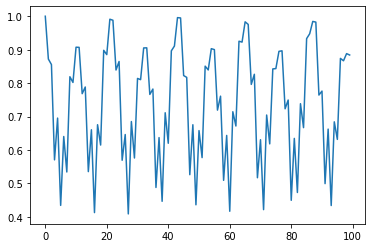

1.0 0
0.8840303809951541
[1.000 0.872 0.856 0.571 0.695 0.434 0.640 0.534 0.819 0.802 0.907 0.907
 0.768 0.788 0.535 0.660 0.413 0.676 0.615 0.898 0.885 0.991 0.988 0.839
 0.865 0.569 0.646 0.409 0.685 0.576 0.814 0.810 0.905 0.906 0.766 0.782
 0.488 0.637 0.447 0.711 0.620 0.897 0.911 0.996 0.995 0.823 0.817 0.526
 0.675 0.436 0.658 0.577 0.851 0.839 0.903 0.900 0.719 0.761 0.509 0.644
 0.417 0.714 0.672 0.925 0.923 0.983 0.976 0.796 0.826 0.517 0.631 0.422
 0.705 0.618 0.842 0.843 0.895 0.897 0.723 0.749 0.450 0.635 0.473 0.738
 0.667 0.933 0.948 0.985 0.982 0.764 0.776 0.499 0.662 0.434 0.684 0.632
 0.874 0.867 0.888 0.884]


In [5]:
from qba import QBA
import numpy as np

## 完全グラフn個繋げる
PATH=[]
n=[5,30]
# prob_vertex=[0,1,2,3,4,5,6,7,8,9]
prob_vertex=[i for i in range(n[0])]
# print(prob_vertex)
qba=QBA().build_barbell_graph(n,PATH)
qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
#print(qba.deg)
# print(qba.arcs)
for i in range(len(qba.arcs)):
    if qba.arcs[i][0]<n[0] and qba.arcs[i][1]<n[0]:
        qba.weights[i]=1.
    # qba.weights[i]=1.
#qba.arc_plot()
qba.non_flow_grover(100,prob_vertex)
qba.plot_origin_prob()

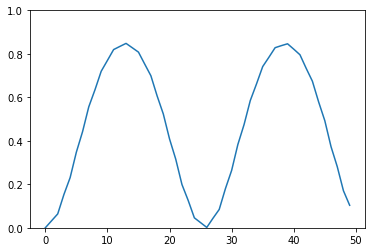

0.8481286856522838 12
0.10352309327665667
[0.032 0.064 0.153 0.231 0.348 0.442 0.556 0.635 0.720 0.770 0.820 0.834
 0.848 0.828 0.808 0.753 0.699 0.607 0.523 0.409 0.316 0.199 0.126 0.046
 0.024 0.002 0.044 0.084 0.180 0.264 0.383 0.475 0.585 0.661 0.741 0.784
 0.828 0.838 0.846 0.822 0.796 0.733 0.674 0.579 0.493 0.373 0.281 0.170
 0.104]


In [24]:
from qba import QBA
import numpy as np

## グラフ2個繋げる ブリッジなし

PATH=[]
n_1=30
k_1=1
n_2=45
k_2=1
G_1=QBA().build_Johnson_graph(n_1,k_1,PATH)
G_2=QBA().build_Johnson_graph(n_2,k_2,PATH)
# G_1=QBA().build_hypercube_graph(n_1,PATH)
# G_2=QBA().build_Johnson_graph(n_2,k_2,PATH)
# G_2=QBA().build_circuit_graph(n_2,PATH)
qba=QBA().star_product(G_1, G_2, PATH)

for i in range(len(G_1.arcs)):
    qba.weights[i]=1.
# qba.weights[qba.deg[0]-1]=0.
# qba.arc_plot()
# print(qba.deg)
# print(qba.arcs)
# print(qba.weights)

prob_arcs= G_2.arcs
qba.non_flow_grover_arcs(50,prob_arcs,True)
qba.plot_origin_prob()

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 0), (2, 0), (2, 1), (3, 4), (3, 5), (3, 0), (4, 5), (4, 3), (5, 3), (5, 4)]


TypeError: QBA.phase_reverse_matrix() takes 3 positional arguments but 4 were given

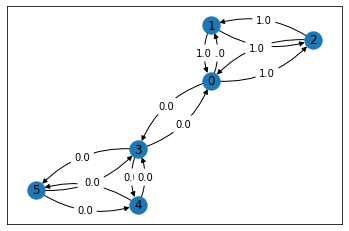

In [1]:
from qba import QBA
import numpy as np

## ジョンソングラフ2個繋げる ブリッジ付き

from qba import QBA
import numpy as np
import math

PATH=[]
n=3
k=1
num_of_v=math.comb(n,k)
add_v=0
v_change=[0,3]
G_1=QBA().build_Johnson_graph(n,k,PATH)
G_2=QBA().build_Johnson_graph(n,k,PATH)
qba=QBA().star_product_with_bridge(G_1, G_2)

for i in range(len(G_1.arcs)+1):
    qba.weights[i]=1.
qba.weights[qba.deg[0]-1]=0.
qba.arc_plot()
# print(qba.deg)
# print(qba.arcs)
# print(qba.weights)

prob_arcs= G_1.arcs
# qba.non_flow_grover_arcs(1,prob_arcs,1,True)
qba.non_flow_grover_arcs_with_olacle(1, prob_arcs, v_change, True)
qba.arc_plot()
qba.plot_origin_prob()

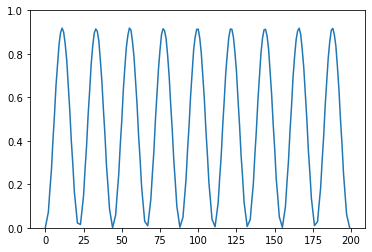

0.9186515821350094 54
0.00039695632417885836
[3.600e-02 7.200e-02 1.737e-01 2.644e-01 4.015e-01 5.196e-01 6.547e-01
 7.520e-01 8.440e-01 8.980e-01 9.184e-01 9.000e-01 8.463e-01 7.723e-01
 6.547e-01 5.407e-01 4.015e-01 2.927e-01 1.653e-01 9.519e-02 2.214e-02
 1.856e-02 1.526e-02 8.301e-02 1.464e-01 2.689e-01 3.782e-01 5.188e-01
 6.302e-01 7.519e-01 8.353e-01 8.947e-01 9.145e-01 9.037e-01 8.601e-01
 7.708e-01 6.733e-01 5.442e-01 4.282e-01 2.865e-01 1.907e-01 8.632e-02
 4.424e-02 6.041e-04 2.978e-02 5.859e-02 1.553e-01 2.441e-01 3.781e-01
 4.925e-01 6.321e-01 7.361e-01 8.299e-01 8.863e-01 9.187e-01 9.093e-01
 8.572e-01 7.866e-01 6.786e-01 5.671e-01 4.241e-01 3.135e-01 1.861e-01
 1.104e-01 2.968e-02 1.932e-02 9.220e-03 7.152e-02 1.302e-01 2.467e-01
 3.518e-01 4.960e-01 6.100e-01 7.305e-01 8.176e-01 8.893e-01 9.153e-01
 9.060e-01 8.695e-01 7.916e-01 6.960e-01 5.654e-01 4.517e-01 3.117e-01
 2.106e-01 1.000e-01 5.260e-02 2.715e-03 2.553e-02 4.784e-02 1.371e-01
 2.213e-01 3.566e-01 4.694e-01 6

In [1]:
from qba import QBA
import numpy as np
import math

## 刺した場所の重みを反転させる
## Johnson
PATH=[]
n=10
k=1
num_of_v=math.comb(n,k)
add_v=0
prob_vertex=[add_v]
num_pin=1
# qba=QBA().build_comp_graph(num_of_v,PATH)
qba=QBA().build_Johnson_graph(n,k,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=num_pin
# print(qba.deg)
qba.arcs.extend([(add_v, num_of_v+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# print(qba.arcs)
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# for i in range(len(qba.arcs)-num_pin*2, len(qba.arcs)-num_pin):
#     qba.weights[i]=1.
# for i in range(len(qba.arcs)-num_pin, len(qba.arcs)):
#     qba.weights[i]=-1.
# qba.arc_plot()
    
# qba.non_flow_grover(200,prob_vertex,num_pin,True)
# qba.plot_origin_prob()

prob_arcs=[(add_v, num_of_v+a) for a in range(num_pin) ] + [(num_of_v+a, add_v) for a in range(num_pin) ]
qba.non_flow_grover_arcs(200,prob_arcs,num_pin,True)
qba.plot_origin_prob()

[0, 1, 2]


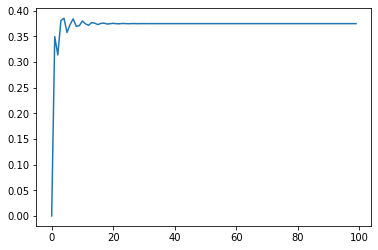

0.38548569011701683 3
0.37500000003060385


In [11]:
from qba import QBA
import numpy as np
import math

## 流出入あり
## グラフの積を考える

n_1=4
k_1=1
n_2=4
k_2=1
v_1=math.comb(n_1,k_1)
v_2=math.comb(n_2,k_2)
inverse_vertex=[]
prob_vertex=[i for i in range(v_1-1)]
print(prob_vertex)
PATH=[]
G_1=QBA().build_Johnson_graph(n_1,k_1,PATH)
G_2=QBA().build_Johnson_graph(n_2,k_2,PATH)
PATH=[(a, 1.) for a in range(v_1+v_2-1)]
qba=QBA().star_product(G_1,G_2,PATH)
# qba=QBA().build_path_graph(num_of_v,PATH)
# qba=QBA().build_circuit_graph(num_of_v,PATH)
# qba.arc_plot()
# qba.weights = np.zeros(len(qba.arcs))
# # qba.arc_plot()
# # print(qba.arcs)
qba.grover(100, inverse_vertex, prob_vertex)
qba.plot_origin_prob()


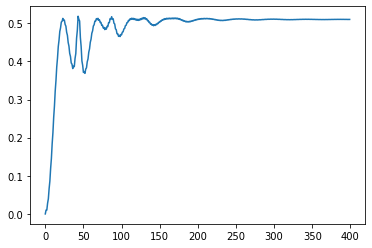

0.5183977499857243 42
0.5100687904604597


In [1]:
from qba import QBA
import numpy as np

## 刺した場所の重みを反転させる
## 完全グラフ上流出入

num_of_v=100
PATH=[(a, 1.) for a in range(num_of_v)]
inverse_vertex=[0]
prob_vertex=[0]
qba=QBA().build_comp_graph(num_of_v,PATH)
#qba=QBA().build_wheel_graph(num_of_v,PATH)
# qba=QBA().build_path_graph(num_of_v,PATH)
# qba=QBA().build_circuit_graph(num_of_v,PATH)
qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
# print(qba.arcs)
qba.grover(400, inverse_vertex, prob_vertex)
qba.plot_origin_prob()


In [22]:
from qba import QBA
import numpy as np
import math

## 流出入与える
## Johnson
n=10
k=3
num_of_v=math.comb(n,k)
PATH=[(a, 1.) for a in range(num_of_v)]
# inverse_vertex=[i for i in range(math.comb(n-k,k), num_of_v)]
inverse_vertex=[0]
# prob_vertex=[0]
# prob_vertex=[num_of_v-1]
prob_vertex=[i for i in range(num_of_v-math.comb(n-k,k), num_of_v)]
# print(prob_vertex)
# qba=QBA().build_comp_graph(num_of_v,PATH)
qba=QBA().build_Johnson_graph(n,k,PATH)
qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
# print(qba.arcs)
# print(qba.deg)
qba.grover(200, inverse_vertex, prob_vertex)
qba.plot_origin_prob()

KeyboardInterrupt: 

In [ ]:
import numpy as np
import cmath

N=10

mat=np.array([[(2*N-4)/(N-1)-1, 2*np.sqrt(N-2)/(N-1),0,0,0],
              [0,0,(2*np.sqrt(N-1))/N,0,((2*N-2)/N)-1],
              [0,0,0,-1,.0],
              [0,0,2/N-1,0,(2*np.sqrt(N-1))/N],
              [2*np.sqrt(N-2)/(N-1),2/(N-1)-1,0,0,0]])
# print(mat)
# print(np.linalg.eig(mat))
ramda_p=((N-2)/(N-1)+np.sqrt((N*N*N-4*N+4)/(N*(N-1)*(N-1))))/2
ramda_m=((N-2)/(N-1)-np.sqrt((N*N*N-4*N+4)/(N*(N-1)*(N-1))))/2
theta_p=np.arccos(ramda_p)
theta_m=np.arccos(ramda_m)
alpha_p=1/(np.sqrt(1/N+ramda_p*ramda_p))
alpha_m=1/(np.sqrt(1/N+ramda_m*ramda_m))
B_star_f_p=np.array([alpha_p*np.sqrt((N-2)/(N*(N-1)))*ramda_p,
                     alpha_p*ramda_p/np.sqrt(N-1),
                     alpha_p/N,
                     0,
                     alpha_p*np.sqrt(N-1)/N])
SB_star_f_p=np.array([alpha_p*np.sqrt((N-2)/(N*(N-1)))*ramda_p,
                     alpha_p*np.sqrt(N-1)/N,
                     0,
                     alpha_p/N,
                     alpha_p*ramda_p/np.sqrt(N-1)])
B_star_f_m=np.array([alpha_m*np.sqrt((N-2)/(N*(N-1)))*ramda_m,
                     alpha_m*ramda_m/np.sqrt(N-1),
                     alpha_m/N,
                     0,
                     alpha_m*np.sqrt(N-1)/N])
SB_star_f_m=np.array([alpha_m*np.sqrt((N-2)/(N*(N-1)))*ramda_m,
                     alpha_m*np.sqrt(N-1)/N,
                     0,
                     alpha_m/N,
                     alpha_m*ramda_m/np.sqrt(N-1)])
spec_U=np.exp(complex(0,theta_m))
ei_vec_p=(B_star_f_p-np.exp(complex(0,theta_p))*SB_star_f_p)/(np.sqrt(2)*np.abs(theta_p))
ei_vec_m=(B_star_f_m-np.exp(complex(0,theta_m))*SB_star_f_m)/(np.sqrt(2)*np.abs(theta_m))
# ei_vec_p=ei_vec_p/np.linalg.norm(ei_vec_p,2)
# ei_vec_1=np.array([1,
#                    -np.sqrt(N-2),
#                    np.sqrt((N-1)*(N-2)),
#                    np.sqrt((N-1)*(N-2)),
#                    -np.sqrt(N-2)])/np.sqrt(2*N*N-4*N+1)
# ei_vec_p=np.array([np.sqrt((N-2)/(N*(N-1)))*(1-np.exp(complex(0,theta_p))),
#                    np.sqrt((N-1)/(N))*(1/(N-1)+ramda_m*np.exp(complex(0,theta_p))),
#                    -ramda_m/(np.sqrt(N)),
#                    (ramda_m*np.exp(complex(0,theta_p)))/(np.sqrt(N)),
#                    (1/(np.sqrt(N*(N-1))))*(-(N-1)*ramda_m-np.exp(complex(0,theta_p)))])/(np.sqrt(2)*np.abs(np.sin(theta_p)))
# print(ramda_p,ramda_m)
# print(theta_p,theta_m)
# print(np.exp(complex(0,theta_p)))
print(ei_vec_p)
# print(B_star_f_p)
# print(alpha_p)
# print(np.linalg.norm(B_star_f_p,2))
# print(np.linalg.norm(SB_star_f_p,2))
# print(np.linalg.norm(ei_vec_p,2))
# print(mat@mat.T)

mat_T=np.array([[(N-2)/(N-1),1/(np.sqrt(N))],
                [1/(np.sqrt(N)),0]])
# ei_vec_p_T=np.array([ramda_p,1/(np.sqrt(N))])*alpha_p
# ei_vec_m_T=np.array([ramda_m,1/(np.sqrt(N))])*alpha_m
# print(ei_vec_p_T,ei_vec_m_T)
# print(mat_T)
# print(np.linalg.eig(mat_T))
# print(ei_vec_p_T,mat_T@ei_vec_p_T)

In [17]:
import math
m=5
N=220
k=3

print(math.pi*math.sqrt(k*(math.factorial(k))**(1/k))*math.sqrt(N**(1+1/k))/(2*math.sqrt(2*m)))

42.26564490620507


In [17]:
import math
N=455
print(math.pow(N,1/2)*math.log(N))

130.5504056901779


In [15]:
## cartesian product

from qba import QBA
import numpy as np
import math
PATH=[]
n_1=5
k_1=2
n_2=5
k_2=1
G_1=QBA().build_Johnson_graph(n_1,k_1,PATH)
G_2=QBA().build_Johnson_graph(n_2,k_2,PATH)
qba=QBA().build_cartesian_product(G_1, G_2, PATH)
# v_inverse=[i for i in range(math.comb(n_2,k_2))]
# qba=QBA().build_comp_graph(num_of_v,PATH)
# qba=QBA().build_Johnson_graph(n,k,PATH)
# qba.weights = np.zeros(len(qba.arcs))
# print(qba.arcs)
# print(len(qba.arcs))
# qba.arc_plot()
# print(qba.deg)
for i in range(len(qba.arcs)):
    if qba.arcs[i][0] <= len(G_2.deg)-1 and qba.arcs[i][1] <= len(G_2.deg)-1:
        qba.weights[i]=1.
# print(qba.weights)
# prob_arcs= [(a+len(G_2.deg)*c,b+len(G_2.deg)*c) for (a,b) in G_2.arcs for c in range(len(G_1.deg))]
prob_arcs=G_2.arcs
# prob_arcs= [(a+n_2,b+n_2) for (a,b) in G_2.arcs]
# prob_arcs= [(a+n_2*2,b+n_2*2) for (a,b) in G_2.arcs]
# print(prob_arcs)
qba.non_flow_grover_arcs(100,prob_arcs,True)
qba.plot_origin_prob()

ValueError: (0, 3) is not in list

101


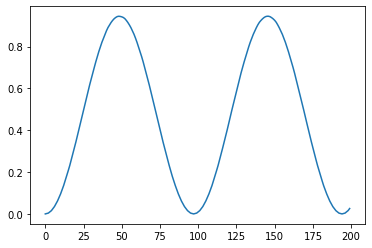

0.9447441435047621 144
0.02583200993879682


In [6]:
## product add pin

from qba import QBA
import numpy as np
import math
PATH=[]
n_1=10
k_1=1
n_2=10
k_2=1
add_v=0
num_pin=1
# inverse_vertex=[i for i in range(math.comb(n_2,k_2))]
# inverse_vertex=[]
# prob_vertex=[i for i in range(math.comb(n_2,k_2))]
# prob_vertex=[9]
G_1=QBA().build_Johnson_graph(n_1,k_1,PATH)
G_2=QBA().build_Johnson_graph(n_2,k_2,PATH)
qba=QBA().build_cartesian_product_by_adjacency(G_1.make_adjacency_matrix(),G_2.make_adjacency_matrix(),PATH)
# qba=QBA().build_direct_product_by_adjacency(G_1.make_adjacency_matrix(),G_2.make_adjacency_matrix(),PATH)
# qba=QBA().build_strong_product_by_adjacency(G_1.make_adjacency_matrix(),G_2.make_adjacency_matrix(),PATH)

for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=num_pin
print(len(qba.deg))
qba.arcs.extend([(add_v, len(qba.deg)-1+a) for a in range(num_pin)])
qba.arcs.extend([(len(qba.deg)-1+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# print(qba.arcs)
# for i in range(len(qba.arcs)):
#     if qba.arcs[i][0] <= len(G_2.deg)-1 and qba.arcs[i][1] <= len(G_2.deg)-1:
#         qba.weights[i]=1.
# print(qba.weights)
# qba.weights[-1]=1.
# qba.weights[-2]=1.
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
prob_arcs=[(add_v, len(qba.deg)-1)] + [(len(qba.deg)-1, add_v)]
qba.non_flow_grover_arcs(200,prob_arcs,num_pin,True)
# qba.grover(100, inverse_vertex, prob_vertex)
qba.plot_origin_prob()

17


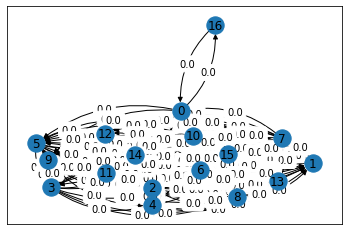

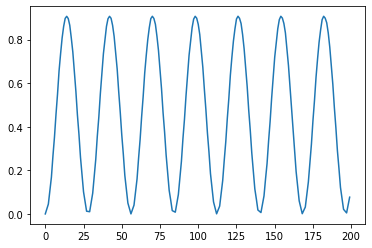

0.9074784556354711 125
0.07683584834825996


In [2]:
## direct product add pin 

from qba import QBA
import numpy as np
import math
PATH=[]
n_1=4
k_1=1
n_2=4
k_2=1
add_v=0
num_pin=1
# inverse_vertex=[i for i in range(math.comb(n_2,k_2))]
# inverse_vertex=[]
# prob_vertex=[i for i in range(math.comb(n_2,k_2))]
# prob_vertex=[9]
G_1=QBA().build_Johnson_graph(n_1,k_1,PATH)
G_2=QBA().build_Johnson_graph(n_2,k_2,PATH)
qba=QBA().build_direct_product_by_adjacency(G_1.make_adjacency_matrix(),G_2.make_adjacency_matrix(),PATH)

for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=num_pin
print(len(qba.deg))
qba.arcs.extend([(add_v, len(qba.deg)-1+a) for a in range(num_pin)])
qba.arcs.extend([(len(qba.deg)-1+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
qba.arc_plot()
# print(qba.arcs)
# for i in range(len(qba.arcs)):
#     if qba.arcs[i][0] <= len(G_2.deg)-1 and qba.arcs[i][1] <= len(G_2.deg)-1:
#         qba.weights[i]=1.
# print(qba.weights)
# qba.weights[-1]=1.
# qba.weights[-2]=1.
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
prob_arcs=[(add_v, len(qba.deg)-1)] + [(len(qba.deg)-1, add_v)]
qba.non_flow_grover_arcs(200,prob_arcs,num_pin,True)
# qba.grover(100, inverse_vertex, prob_vertex)
qba.plot_origin_prob()

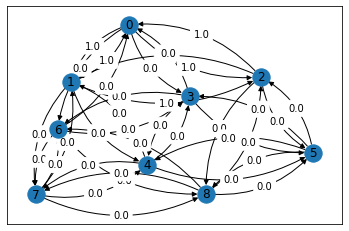

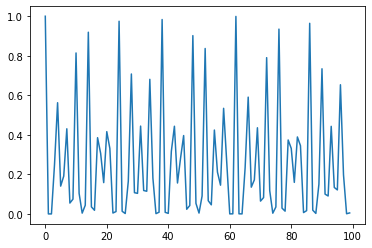

0.9990690504626751 61
0.005021971019767673


In [12]:
from qba import QBA
import numpy as np
import math

n_1=3
k_1=1
n_2=3
k_2=1
PATH=[]
G_1=QBA().build_Johnson_graph(n_1,k_1,PATH)
G_2=QBA().build_Johnson_graph(n_2,k_2,PATH)
# print(G_1.make_adjacency_matrix(),G_2.make_adjacency_matrix())
qba=QBA().build_cartesian_product_by_adjacency(G_1.make_adjacency_matrix(),G_2.make_adjacency_matrix(),PATH)
for i in range(len(qba.arcs)):
    if qba.arcs[i][0] <= len(G_2.deg)-1 and qba.arcs[i][1] <= len(G_2.deg)-1:
        qba.weights[i]=1.
# print(qba.weights)
# prob_arcs= [(a+len(G_2.deg)*c,b+len(G_2.deg)*c) for (a,b) in G_2.arcs for c in range(len(G_1.deg))]
prob_arcs=G_2.arcs
# prob_arcs= [(a+n_2,b+n_2) for (a,b) in G_2.arcs]
# prob_arcs= [(a+n_2*2,b+n_2*2) for (a,b) in G_2.arcs]
# print(prob_arcs)
qba.arc_plot()
qba.non_flow_grover_arcs(100,prob_arcs,True)
qba.plot_origin_prob()

ValueError: (0, 6) is not in list

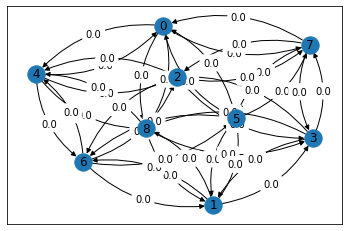

In [13]:
from qba import QBA
import numpy as np
import math

n_1=3
k_1=1
n_2=3
k_2=1
PATH=[]
G_1=QBA().build_Johnson_graph(n_1,k_1,PATH)
G_2=QBA().build_Johnson_graph(n_2,k_2,PATH)
# print(G_1.make_adjacency_matrix(),G_2.make_adjacency_matrix())
qba=QBA().build_direct_product_by_adjacency(G_1.make_adjacency_matrix(),G_2.make_adjacency_matrix(),PATH)
# for i in range(len(qba.arcs)):
#     if qba.arcs[i][0] <= len(G_2.deg)-1 and qba.arcs[i][1] <= len(G_2.deg)-1:
#         qba.weights[i]=1.
# print(qba.weights)
# prob_arcs= [(a+len(G_2.deg)*c,b+len(G_2.deg)*c) for (a,b) in G_2.arcs for c in range(len(G_1.deg))]
qba.arc_plot()
qba.weights[0]=1.
# prob_arcs=G_2.arcs
prob_arcs=[(0,6)]
# prob_arcs= [(a+n_2,b+n_2) for (a,b) in G_2.arcs]
# prob_arcs= [(a+n_2*2,b+n_2*2) for (a,b) in G_2.arcs]
# print(prob_arcs)
# print(qba.arcs)
# print(qba.deg)
qba.non_flow_grover_arcs(200,prob_arcs,True)
qba.plot_origin_prob()

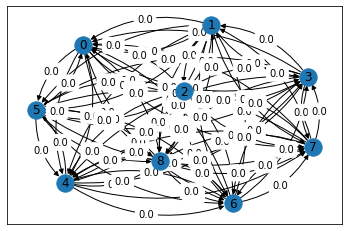

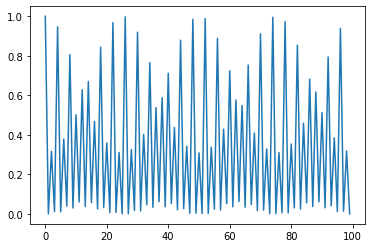

0.9969673523192665 25
5.458679964952696e-05


In [14]:
from qba import QBA
import numpy as np
import math

n_1=3
k_1=1
n_2=3
k_2=1
PATH=[]
G_1=QBA().build_Johnson_graph(n_1,k_1,PATH)
G_2=QBA().build_Johnson_graph(n_2,k_2,PATH)
# print(G_1.make_adjacency_matrix(),G_2.make_adjacency_matrix())
qba=QBA().build_direct_product_by_adjacency(G_1.make_adjacency_matrix(),G_2.make_adjacency_matrix(),PATH)
qba=QBA().build_strong_product_by_adjacency(G_1.make_adjacency_matrix(),G_2.make_adjacency_matrix(),PATH)
# for i in range(len(qba.arcs)):
#     if qba.arcs[i][0] <= len(G_2.deg)-1 and qba.arcs[i][1] <= len(G_2.deg)-1:
#         qba.weights[i]=1.
# print(qba.weights)
# prob_arcs= [(a+len(G_2.deg)*c,b+len(G_2.deg)*c) for (a,b) in G_2.arcs for c in range(len(G_1.deg))]
qba.arc_plot()
qba.weights[0]=1.
# prob_arcs=G_2.arcs
prob_arcs=[(0,1)]
# prob_arcs= [(a+n_2,b+n_2) for (a,b) in G_2.arcs]
# prob_arcs= [(a+n_2*2,b+n_2*2) for (a,b) in G_2.arcs]
# print(prob_arcs)
# print(qba.arcs)
# print(qba.deg)
qba.non_flow_grover_arcs(100,prob_arcs,True)
qba.plot_origin_prob()

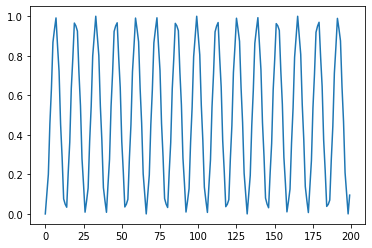

0.9999964705424151 32
0.09507234171323248


In [38]:
from qba import QBA
import numpy as np
import math

n_1=10
k_1=1
n_2=10
k_2=1
PATH=[]
G_1=QBA().build_Johnson_graph(n_1,k_1,PATH)
G_2=QBA().build_Johnson_graph(n_2,k_2,PATH)
qba=QBA().star_product(G_1, G_2)
for i in range(len(qba.arcs)):
    if qba.arcs[i][0] <= len(G_1.deg)-1 and qba.arcs[i][1] <= len(G_1.deg)-1:
        qba.weights[i]=1.
# print(qba.weights)
# prob_arcs= [(a+len(G_2.deg)*c,b+len(G_2.deg)*c) for (a,b) in G_2.arcs for c in range(len(G_1.deg))]
# qba.arc_plot()
# qba.weights[0]=1.
prob_arcs=G_2.arcs
# qba.arc_plot()
# prob_arcs=[(0,1)]
# prob_arcs= [(a+n_2,b+n_2) for (a,b) in G_2.arcs]
# prob_arcs= [(a+n_2*2,b+n_2*2) for (a,b) in G_2.arcs]
# print(prob_arcs)
# print(qba.arcs)
# print(qba.deg)
qba.non_flow_grover_arcs(200,prob_arcs,True)
qba.plot_origin_prob()

[(0, 1), (1, 2), (2, 0), (3, 1), (4, 2), (5, 0), (6, 1), (7, 2), (8, 0)]
[(0, 1), (0, 2), (0, 5), (0, 8), (1, 2), (1, 0), (1, 3), (1, 6), (2, 0), (2, 1), (2, 4), (2, 7), (3, 1), (4, 2), (5, 0), (6, 1), (7, 2), (8, 0), (2, 3), (3, 2)]


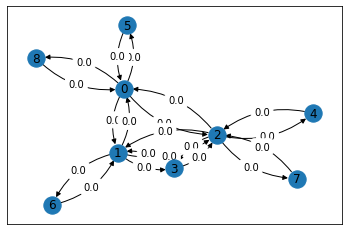

In [1]:
from qba import QBA
import numpy as np

## 刺した場所の重みを反転させる
PATH=[]
num_of_v=3
add_v=num_of_v-1
# add_v=0
prob_vertex=[num_of_v-1]
num_pin=1

# qba=QBA().build_wheel_graph(num_of_v,PATH)
qba=QBA().build_two_dim_torus(num_of_v,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=num_pin
#print(qba.deg)
qba.arcs.extend([(add_v, num_of_v+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
print(qba.arcs)
qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
    
# qba.non_flow_grover(140,prob_vertex,num_pin,True)
# qba.plot_origin_prob()

# prob_arcs=[(add_v, num_of_v+a) for a in range(num_pin) ] + [(num_of_v+a, add_v) for a in range(num_pin) ]
# # prob_arcs=[(num_of_v+a, add_v) for a in range(num_pin) ]
# qba.non_flow_grover_arcs(120,prob_arcs,num_pin,True)
# qba.plot_origin_prob()

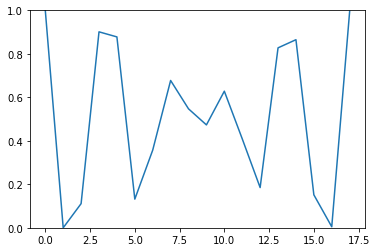

0.9957348888107855 16


In [1]:
from qba import QBA
import numpy as np

##total graph
PATH=[]
N=4
time=18
qba=QBA().build_comp_graph(N,PATH)
# qba=QBA().build_circuit_graph(N,PATH)
# qba=QBA().build_Johnson_graph(N,2,PATH)
# qba=QBA().build_wheel_graph(N,PATH)
# qba=QBA().build_comp_biber_graph(N,N,PATH)
prob_vertex=[i for i in range(len(qba.deg))]
T_G=QBA().make_total_graph(qba,PATH)
T_G.weights = np.zeros(len(T_G.arcs))
for i,(a,b) in enumerate(T_G.arcs):
    if a<len(qba.deg) and b<len(qba.deg):
        T_G.weights[i]=1.
# qba.arc_plot()
# T_G.arc_plot()
# print(T_G.arcs)
# print(T_G.weights)

T_G.non_flow_grover(time,prob_vertex)
T_G.plot_origin_prob()

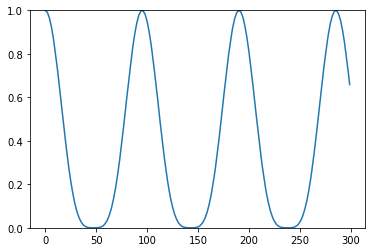

0.9998314465726291 189


In [47]:
from qba import QBA
import numpy as np

PATH=[]
N=10
times=300
epsilon=0.1
G_1=QBA().build_comp_graph(N,PATH)
G_2=QBA().build_comp_graph(N,PATH)
qba=QBA().star_product_with_bridge(G_1, G_2)

n_1=len(G_1.deg)
n_2=len(G_2.deg)

bridge_vertex=[0, n_1]
qba.weights = np.zeros(len(qba.arcs))
for i,(a,b) in enumerate(qba.arcs):
    if a<n_1 and b<n_1:
        qba.weights[i]=1.
# for i,(a,b) in enumerate(qba.arcs):
#     if a>=n_1 and b>=n_1:
#         qba.weights[i]=1.

# qba.arc_plot()
prob_arcs=G_1.arcs

qba.grover_with_epsilon(times, prob_arcs, epsilon, bridge_vertex)
qba.plot_origin_prob()